Hacer un ejemplo de un multy-type branching process. Donde se tengan distribuciones poisson en el numero de hijos. Esto por que se vio que la esperanza de las proporciones de las generaciones se comportaban bien cuando se considera distribuciones poisson para el numero de hijos. 

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import random
import seaborn as sns
import scipy

In [2]:
from Funciones_auxiliares import *

## Definir la matriz de transicion y los parametros de las distribuciones poisson

In [3]:
etiquetas = ['red', 'blue', 'green', 'purple']

In [4]:
# definir la matriz de transicion
transition_matrix = generate_random_transition_matrix(etiquetas)

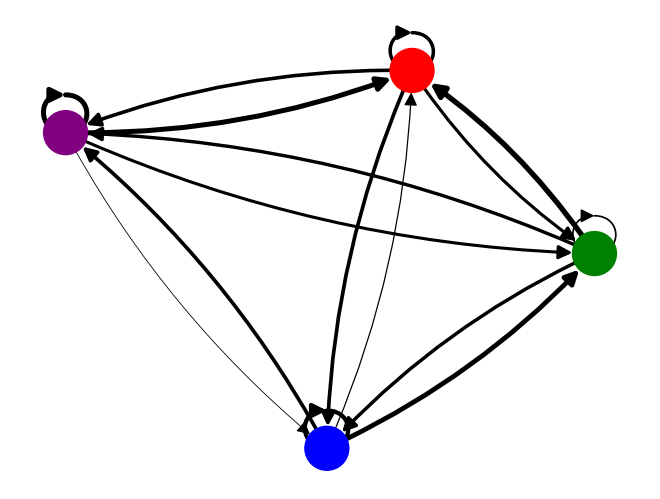

In [5]:
# comprobar que tenga tantas entradas como etiquetas hay
# matriz cuadrada
assert transition_matrix.shape[0] == transition_matrix.shape[1]
# tenga entradas para todas las etiqueta
assert transition_matrix.shape[0] == len(etiquetas)

# comprobar que es matriz de transicion
assert comprobar_matriz_probabilidad(transition_matrix)

# ver la matriz de transicion
visualize_markov_chain(etiquetas, transition_matrix)

Para cada tipo dar el parametro de la distribucion poisson sobre el numero de hijos.

In [6]:
# dar el parametro por cada tipo
lambdas_por_tipos = [1.3, 2.5, 0.7, 0.4]

In [7]:
# comprobar que se tengan tantos parametros como etiquetas
assert len(lambdas_por_tipos) == len(etiquetas)

Creando y etiquetando la generacion: 1
	Numero de nodos en esta generacion: 0 
Creando y etiquetando la generacion: 2
	Numero de nodos en esta generacion: 0 
Creando y etiquetando la generacion: 3
	Numero de nodos en esta generacion: 0 


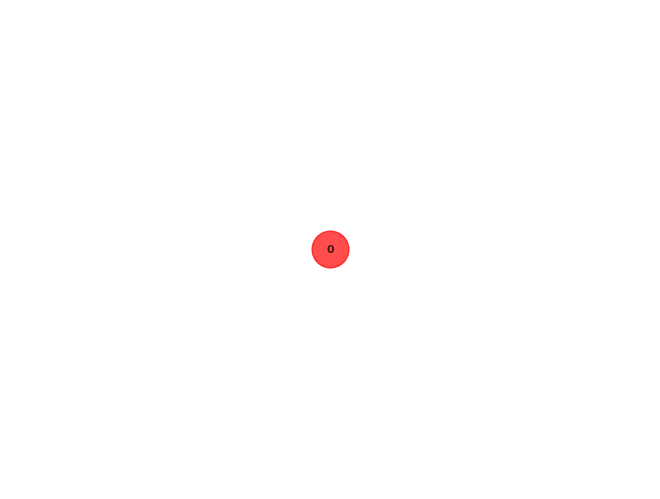

In [8]:
# hacer un arbol pequeño para ver si funciona
grafo, _ = generar_multi_bp_poisson(numero_de_generaciones = 3, transition_matrix = transition_matrix, 
                                    lamba_vector = lambdas_por_tipos, etiquetas = etiquetas, indice_etiqueta_raiz=0)

draw_tree(grafo, root = 0, colores=True)

In [9]:
# hacer la matriz H
H = np.diag(lambdas_por_tipos)
H

array([[1.3, 0. , 0. , 0. ],
       [0. , 2.5, 0. , 0. ],
       [0. , 0. , 0.7, 0. ],
       [0. , 0. , 0. , 0.4]])

In [10]:
# la matriz P es la traspuesta de esta, por como se considera en la teoria
P = transition_matrix.T
P

array([[0.25096915, 0.08847233, 0.38413587, 0.36139432],
       [0.26496739, 0.30374921, 0.24947799, 0.05933927],
       [0.22644411, 0.34314385, 0.12273316, 0.22057464],
       [0.25761935, 0.26463461, 0.24365298, 0.35869176]])

In [11]:
# multiplicarlas
PH = np.dot(P, H)
PH

array([[0.32625989, 0.22118083, 0.26889511, 0.14455773],
       [0.3444576 , 0.75937303, 0.17463459, 0.02373571],
       [0.29437735, 0.85785962, 0.08591321, 0.08822986],
       [0.33490516, 0.66158652, 0.17055709, 0.14347671]])

## PH converge?

In [12]:
np.linalg.matrix_power(PH, 100)

array([[5.29051577e+07, 9.92946073e+07, 2.97872886e+07, 1.18088658e+07],
       [7.28644020e+07, 1.36754950e+08, 4.10249788e+07, 1.62639330e+07],
       [7.50210245e+07, 1.40802589e+08, 4.22392260e+07, 1.67453089e+07],
       [7.35854101e+07, 1.38108168e+08, 4.14309294e+07, 1.64248680e+07]])

In [13]:
np.linalg.matrix_power(PH, 200)

array([[1.31376310e+16, 2.46572540e+16, 7.39690466e+15, 2.93242716e+15],
       [1.80939944e+16, 3.39595637e+16, 1.01874951e+16, 4.03872818e+15],
       [1.86295360e+16, 3.49646904e+16, 1.04890221e+16, 4.15826546e+15],
       [1.82730382e+16, 3.42956005e+16, 1.02883024e+16, 4.07869222e+15]])

## Curiosidades

Note que $(PH)^n v$ si depende de $v$.

Sin embargo, las proporciones se mantienen.

Estas proporciones no son la distribucion limite.

In [14]:
n = 100
PH_n = np.linalg.matrix_power(PH, n)

In [15]:
# multiplticar por un vector, ver proporciones
v = np.array([4, 1, 2, 3])

resultado = np.dot(PH_n, v)
#print(resultado)

# normalizar
resultado_normalizado = resultado/resultado.sum()
print(resultado_normalizado)

[0.19281992 0.26556406 0.27342416 0.26819187]


In [16]:
# multiplticar por un vector, ver proporciones
v = np.random.randint(0,11, 4)

resultado = np.dot(PH_n, v)
#print(resultado)

# normalizar
resultado_normalizado = resultado/resultado.sum()
print(resultado_normalizado)

[0.19281992 0.26556406 0.27342416 0.26819187]


In [17]:
# la proporcion a la que converge
# claramente es la proporicon de las columnas de PH_n
id_columna = 0
PH_n[:, id_columna]/PH_n[:, id_columna].sum()

array([0.19281992, 0.26556406, 0.27342416, 0.26819187])

In [18]:
# comparar con la limite, no es igual, solo un poco parecida
get_distribucion_limite(transition_matrix)

La cadena es irreducible
La cadena es aperiodica


[0.27819742095348937,
 0.21110752143904246,
 0.22597323674981803,
 0.28472182085765]

### Ver que la proporcion convergencia es el vector propio de Perron-Frobenius

In [19]:
# obtener vectores y valores propios
eigenvalues, eigenvectors = np.linalg.eig(PH)

# ver el indice del valor propio de perro-frobenius
indice_perron = np.argmax(np.abs(eigenvalues))

# tomar el vector propio asociado
vector_propio_perron = eigenvectors[:, indice_perron]

# normalizar para que sean proporciones
proporciones_perron = vector_propio_perron/vector_propio_perron.sum()

proporciones_perron

array([0.19281992, 0.26556406, 0.27342416, 0.26819187])

In [20]:
# ver que es igual a la proporcion que se tenia antes
resultado_normalizado

array([0.19281992, 0.26556406, 0.27342416, 0.26819187])